# Laboratorio 1 – Machine Learning  
## Predicción del Riesgo Cardiovascular – AlpesHearth  

### Integrantes:
1. Juan Sebastian Rodriguez Torres - 202214617 - js.rodriguezt1@uniandes.edu.co
2. Luis Felipe Sales Galviz - 202211531 - l.sales@uniandes.edu.co


## 1. Carga de datos:

En esta sección se cargan los conjuntos de datos de entrenamiento, para comprender el significado de cada variable.
Con esto verificamos la estructura del dataset, las dimensiones, los tipos de variables y los datos en general antes de que empecemos a explorar y corregir.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from scipy.stats import ttest_1samp, shapiro
import scipy.stats as stats

from importlib.metadata import version

""" print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Matplotlib: {version('matplotlib')}")
print(f"Versión de Scikit-learn: {version('scikit-learn')}")
print(f"Versión de Seaborn: {version('seaborn')}") """


df_real = pd.read_csv("./data/Datos Lab 1.csv")
df = df_real.copy()   # Para el modelo 1
df2 = df_real.copy()  # Para el modelo 2

print("\n◉ IMPRESIÓN DEL DATAFRAME PARA OBSERVAR CARGA CORRECTA:\n")
df



◉ IMPRESIÓN DEL DATAFRAME PARA OBSERVAR CARGA CORRECTA:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,12/04/2022,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,12/04/2022,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,...,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,"September 06, 2025",M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


## 2. Exploración y perfilamiento de datos:

Aqui vamos a que permite identificar posibles problemas y transformaciones necesarias para poder seguir con el modelado.

- Ver el tamaño y los tipos de datos
- Analizar valores nulos
- Identificar registros duplicados
- Estadisticas numéricas
- Verificar correlaciones entre variables
- Identificar valores atipicos


### Completitud de datos

In [5]:
print("\n◉ PORCENTAJE DE VALORES NULOS DE CADA ENTRADA:\n")
tabla_nulos = (df.isnull().mean() * 100).to_frame().T
tabla_nulos



◉ PORCENTAJE DE VALORES NULOS DE CADA ENTRADA:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,0.0,0.0,0.0,4.148871,4.453935,3.721782,3.233679,3.721782,0.0,4.148871,...,0.0,0.0,4.148871,4.636974,3.721782,5.186089,0.0,3.47773,1.769372,0.0


In [6]:
print("◉ (EXPLORACIÓN) QUÉ PASA SI ELIMINAMOS TODOS LOS REGISTROS CON DATOS NULOS:")
print("Tamaño antes:", df.shape)
df_prueba1 = df.dropna()
print("Tamaño después:", df_prueba1.shape)



◉ (EXPLORACIÓN) QUÉ PASA SI ELIMINAMOS TODOS LOS REGISTROS CON DATOS NULOS:
Tamaño antes: (1639, 24)
Tamaño después: (936, 24)


In [26]:
print("\n\n◉ INFORMACION DEL DATAFRAME (NO NULOS Y TIPOS DE DATOS):\n")
df.info()



◉ INFORMACION DEL DATAFRAME (NO NULOS Y TIPOS DE DATOS):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Sm

In [7]:
print("\n\n◉ DESCRIPCIÓN ESTADÍSTICA - VARIABLES NUMÉRICAS:\n")
df.describe()



◉ DESCRIPCIÓN ESTADÍSTICA - VARIABLES NUMÉRICAS:



,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000




◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:



<Axes: >

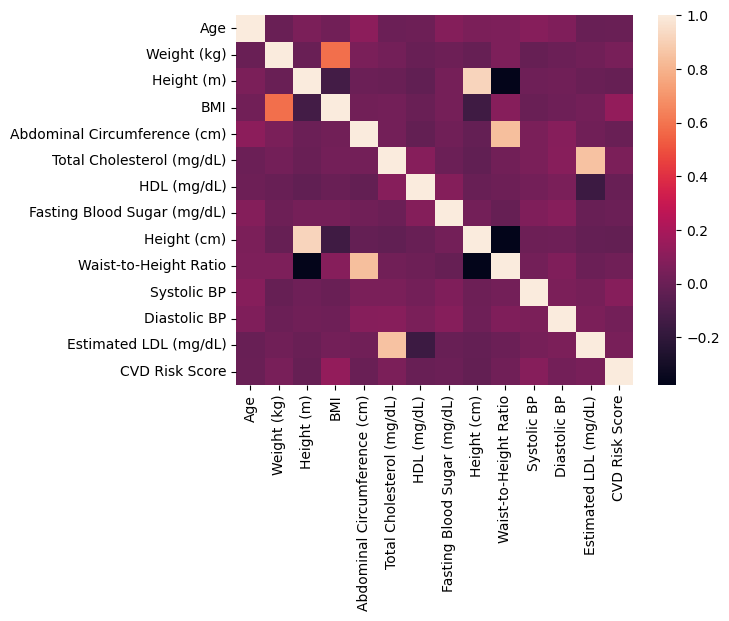

In [ ]:
print("\n\n◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:\n")
sns.heatmap(df.corr(numeric_only=True))

### Unicidad de datos

In [12]:
print("\n\n◉ VERIFICAMOS LOS REGISTROS DUPLICADOS:\n")
df.duplicated(keep  = False).sum()
df[df.duplicated(keep = False)]



◉ VERIFICAMOS LOS REGISTROS DUPLICADOS:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
10,oSqq7069,18 Jun 23,F,38.0,68.516,1.929,39.967,96.957,105/84,241.000,...,Moderate,Y,192.936,0.503,105.0,84.0,Hypertension Stage 1,159.0,18.063,HIGH
14,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.000,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
29,RlsB8509,29/08/2020,F,55.0,79.700,1.780,25.200,86.900,140/62,248.000,...,Moderate,Y,178.000,0.488,140.0,62.0,Hypertension Stage 2,182.0,19.000,HIGH
31,RwGu5647,"May 03, 2020",M,42.0,51.095,1.521,20.190,72.274,159/91,296.000,...,Moderate,N,152.080,0.259,159.0,91.0,Hypertension Stage 2,211.0,17.908,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,KiRC8867,20/12/2024,M,46.0,90.748,1.705,30.866,108.768,105/113,198.000,...,Moderate,N,170.518,0.638,105.0,113.0,Hypertension Stage 2,117.0,15.383,INTERMEDIARY
1614,XUjh9519,2022-08-15,F,55.0,73.500,1.880,20.800,82.700,144/72,21.662,...,Low,Y,188.000,0.440,144.0,72.0,Hypertension Stage 2,100.0,16.680,HIGH
1624,rZFB5714,05 Sep 21,M,NaN,55.600,1.830,16.600,104.800,126/95,289.000,...,High,N,183.000,0.573,126.0,95.0,Hypertension Stage 2,201.0,15.400,INTERMEDIARY
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH


In [13]:
print("\n\n◉ VERIFICAMOS LOS PACIENTES CON REGISTROS DUPLICADOS:\n")

tabla = (
    df[df["Patient ID"].duplicated(keep=False)]
    .copy()
    .assign(repeticiones=df.groupby("Patient ID")["Patient ID"].transform("size"))
    .sort_values(["repeticiones", "Patient ID"], ascending=[False, True])
    
)

tabla



◉ VERIFICAMOS LOS PACIENTES CON REGISTROS DUPLICADOS:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,repeticiones
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH,3
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW,3
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,yvsn3005,28 Oct 20,F,60.0,54.300,1.810,16.600,99.1,133/65,187.0,...,N,181.000,0.548,133.0,65.0,Hypertension Stage 1,79.0,15.710,INTERMEDIARY,2
95,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
375,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
799,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH,2




◉ HISTOGRAMA PARA VER APROXIMADAMENTE VALORES ATÍPICOS



<Axes: >

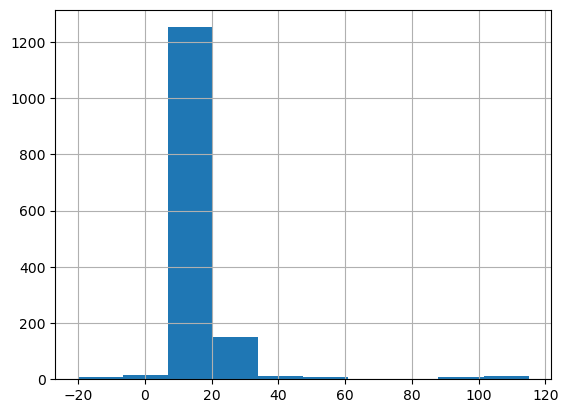

In [14]:
print("\n\n◉ HISTOGRAMA PARA VER APROXIMADAMENTE VALORES ATÍPICOS\n")
df["CVD Risk Score"].hist()

### CONCLUSIÓNES INICIALES:

1. Respecto a la COMPLETITUD podemos notar que hay una gran cantidad de registros que tienen valores nulos en algunos de sus componentes. Aunque todos son menores al 5%, notamos que al eliminar todos los registros con valores nulos se eliminan casi el 50% de los datos por lo que esta no sería una solución óptima.

2. Tambien notamos que entre la mayoría de las variables no hay correlación, sin embargo hay 3 relaciones específicas que sí es necesario tomar en cuenta:
    
    a. BMI tiene una alta correlacion con Weight (Kg)
    
    b. Waist-to-Height Ratio tiene una alta correlacion con Abdominal Circumference
    
    c. Total Cholesterol tiene una alta correlación con Estimated LDL

3. Respecto a la UNICIDAD notamos que existe un gran número de registros duplicados y especificamente pacientes que tienen más de una vez un registro con exactamente los mismos datos, incluso en fecha, por lo que podemos prescindir de ellos.

# 3. Limpieza y preparación de datos:

Con base en los hallazgos del análisis anterior vamos a modificar los datos para luego proceder al modelado.

Se encontraron 434 pacientes con datos duplicados, por lo que decidimos eliminarlos. **Revisando de nuevo encontramos estos pacientes duplicados tienen los mismos datos a excepcion del CVD Risk Score, por lo que asumimos que son multiples mediciones que se hicieron el mismo dia y consideramos más optimo dejar aquella que resultó con un puntaje mayor para registrar al paciente bajo el riesgo maximo detectado.**
 Vamos a eliminar los duplicados antes de realizar los modelos con pipeline, para no desalinear valores de X y Y.

Tambien notamos que en la mayoría de variables hay entre un 1% y 5% de datos nulos, sin embargo al hacer la prueba de eliminar estos registros en su totalidad se elimina casi la mitad del dataframe por lo que no es óptimo.

Los únicos registros que decidimos eliminar son aquellos que tenian la variable objetivo nula porque imputar estos datos puede dar lugar a sesgos, además son solo 29 de los 1639 registros, lo que no es una reducción importante de datos y podemos prescindir de ellos.

Tambien decidimos preparar una función para el pipeline que eliminará las columnas **Patient ID, Date of Service y Blood Pressure (mmHg)**, ya que las 2 primeras no son útiles para los calculos y Blood Pressure es un dato reduntante que está dado por las columnas **Systolic BP y Diastolic BP**

Para el resto de valores nulos se harán imputaciones con enfoques distintos para cada modelo.

Por último, notamos por el histograma que hay una cantidad muy pequeña de valores atípicos que se encuentran muy a los extremos lo que podría dañar la regresión lineal. Por lo que se trabajará mas adelante de forma distinta en cada modelo.

In [49]:
antes = df.shape[0]

df = df.sort_values(["Patient ID", "CVD Risk Score"], ascending=[True, False])
df = df.drop_duplicates(subset="Patient ID", keep="first")

df2 = df2.sort_values(["Patient ID", "CVD Risk Score"], ascending=[True, False])
df2 = df2.drop_duplicates(subset="Patient ID", keep="first")

despues = df.shape[0]

print(f"Duplicados eliminados: {antes - despues} (quedan {despues})")

Duplicados eliminados: 263 (quedan 1376)


In [50]:
print(f"ANTES - Registros con Risk Score nulos en df: {df[target].isnull().sum()}")
print(f"ANTES - Registros con Risk Score nulos en df2: {df2[target].isnull().sum()}")

target = "CVD Risk Score"
df = df.dropna(subset=[target])
df2 = df2.dropna(subset=[target])

print(f"DESPUES - Registros con Risk Score nulos en df: {df[target].isnull().sum()}")
print(f"DESPUES - Registros con Risk Score nulos en df2: {df2[target].isnull().sum()}")

ANTES - Registros con Risk Score nulos en df: 27
ANTES - Registros con Risk Score nulos en df2: 27
DESPUES - Registros con Risk Score nulos en df: 0
DESPUES - Registros con Risk Score nulos en df2: 0


In [51]:
#FUNCION DE ELIMINAR COLUMNAS ESPECÍFICAS PARA USO POSTERIOR EN PIPELINE

columnas_drop = ["Patient ID", "Date of Service", 
                "Blood Pressure (mmHg)"]
def drop(df):
    return df.drop(columns=columnas_drop, errors="ignore")

dropper = FunctionTransformer(drop, validate=False)

## 4. Construcción de modelos de regresión lineal

Ahora construiremos los modelos de regresión lineal solicitados.

### 4.1 Modelo 1

CVD Risk Score tiene valores que se comportan como outliers, con un minimo muy bajo y un maximo muy alto. Esto no es posible, ya que el CVD Risk Score es un porcentaje que representa la probabilidad de que una persona desarrolle una enfermedad cardiovascular en los próximos 10 años, por lo que su valor debe ser entre 0 y 100 por lo tanto vamos a corregir estos valores eliminando valores que se encuentran en antes de percentil 5 y despues del 95 que fue lo que se consideró que eliminó mas datos atipicos sin perjudicar el dataframe.

In [52]:

Q1 = df["CVD Risk Score"].quantile(0.05)
Q3 = df["CVD Risk Score"].quantile(0.95)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["CVD Risk Score"] >= lower) & (df["CVD Risk Score"] <= upper)]

### Validez de datos
Observando algunos datos estadisticos del dataframe encontramos algunos datos que no son validos. Por ejemplo, el colesterol total tiene un min = - 1.256, pasaremos este valor a positivo con valor absoluto, por otra parte, el LDL estimado tiene min= -92.055. Haremos lo mismo, pondremos el absoluto de estos valores. Luego los utilizaremos en el pipeline.

In [53]:
def limpiar_colesterol(df):
    df["Total Cholesterol (mg/dL)"] = df["Total Cholesterol (mg/dL)"].abs()
    return df

def limpiar_ldl(df):
    df["Estimated LDL (mg/dL)"] = df["Estimated LDL (mg/dL)"].abs()
    return df

limpieza_colesterol = FunctionTransformer(limpiar_colesterol)
limpieza_ldl = FunctionTransformer(limpiar_ldl)

Podemos separar ahora la columna Blood Pressure y reemplazar los datos de Systolic Bp o Diastolic BP donde estan esten vacias.

In [54]:
def separar_presion(df):
    df = df.copy()
    if "Blood Pressure (mmHg)" in df.columns:
        bp = df["Blood Pressure (mmHg)"].str.extract(r'(\d+)/(\d+)')
        
        df["Systolic BP"] = bp[0].astype(float)
        df["Diastolic BP"] = bp[1].astype(float)
        
    return df

separacion_presion = FunctionTransformer(separar_presion)                  

Vamos a crear un pipeline de limpieza de datos para poder aplicar las mismas transformaciones a los datos de entrenamiento y prueba, esto es importante para evitar sesgos y asegurar que el modelo se entrene con datos limpios y consistentes.

In [55]:
target = "CVD Risk Score"
X = df.drop(columns=[target])
y = df[target]

Luego se dividie el conjunto de datos en entrenamiento y prueba, con el valor semilla que nos solicitaron de 42 y un porcentaje de 25% para el conjunto de prueba.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Por el heatmap notamos que la mayoria de los datos no están correlacionados excepto por **Abdominal Circunference con Waist-to-Height Ratio** y **Total Cholesterol con Estimated LDL (mg/dL)**. Por lo que imputaremos los datos nulos de estas variables usando el método de varialbes correlacionadas.

In [57]:
def imputar_total_cholesterol_con_ldl(df):
    y = "Total Cholesterol (mg/dL)"
    x = "Estimated LDL (mg/dL)"

    k = (df[y] / df[x]).dropna().median()
    df = df.fillna({y: k * df[x]})
    df[y] = df[y].round()
    return df

chol_imputer = FunctionTransformer(imputar_total_cholesterol_con_ldl, validate=False)

In [58]:
def imputar_waist_to_height_ratio_con_circ(df):
    ratio = "Waist-to-Height Ratio"
    circ = "Abdominal Circumference (cm)"
    k = (df[ratio] / df[circ]).dropna().median()
    df = df.fillna({ratio: k * df[circ]})
    df[ratio] = df[ratio].round()
    return df
waist_height_imputer = FunctionTransformer(imputar_waist_to_height_ratio_con_circ, validate=False)

Ahora vamos a clasificarlas variables numericas y categoricas, cada una va a tener una entrada en el pipline según su clasificación.

In [59]:
numeric_features = [
    "Age", "Weight (kg)", "Height (m)", "BMI", "Height (cm)",
    "Abdominal Circumference (cm)", "Total Cholesterol (mg/dL)",
    "HDL (mg/dL)", "Fasting Blood Sugar (mg/dL)",
    "Waist-to-Height Ratio", "Systolic BP", "Diastolic BP",
    "Estimated LDL (mg/dL)",
]

numeric_scaled_features = numeric_features 

ordinal_features = ["Physical Activity Level", "Blood Pressure Category", 
                    "CVD Risk Level"]

categorical_features = [
    "Sex", "Smoking Status", "Diabetes Status",
    "Family History of CVD",
]

Ahora vamos hacer las transformaciones necesarias para el modelo de regresion lineal, en este caso vamos hacer el tratamiento de valores faltantes imputando el resto de los datos por la mediana.

In [60]:
numeric_scaled_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
    ]
)

Ahora vamos hacer la transformación de las variables categorcias, si hay boolean con one-hot encoding pasamos estos valores a binarios, y si hay variables categoricas con mas de dos categorias con one-hot los pasamos a binarios.
De la misma manera, para las variables ordinales vamos a usar ordinal encoding, ya que estas variables tienen un orden natural y el modelo de regresion lineal puede beneficiarse de esta información.

In [61]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    (
        "ordinal",
        OrdinalEncoder(
            categories=[
                ["Low", "Moderate", "High"],
                ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"],
                ["LOW", "INTERMEDIARY", "HIGH"]
            ],
            handle_unknown="use_encoded_value",
            unknown_value=np.nan,
        ),
    ),
    ("imputer_after", SimpleImputer(strategy="most_frequent")),
])

Ahora con ColumnTransformer vamos aplicar las transformaciones para cada tipo de variable, asi preprocesamos en un bloque las tres variables ordinales , numericas y categoricas.

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_scaled", numeric_scaled_transformer, numeric_scaled_features),
        ("ord", ordinal_transformer, ordinal_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Finalmente definimos todo el pipeline integrando las transformaciones anteriores.

In [63]:
pipeline_regresion = Pipeline(steps=[
    ("separacion_presion", separacion_presion),
    ("dropper", dropper), 
    ("limpiar_colesterol", limpieza_colesterol),
    ("limpiar_ldl", limpieza_ldl),
    ("imputacion_chol", chol_imputer),
    ("imputacion_wthr", waist_height_imputer),
    ("preprocessor", preprocessor),
])

In [64]:
from sklearn import set_config
set_config(display="diagram")

pipeline_regresion

Pipeline(steps=[('separacion_presion',
                 FunctionTransformer(func=<function separar_presion at 0x000002341FA25280>)),
                ('dropper',
                 FunctionTransformer(func=<function drop at 0x000002341FA25790>)),
                ('limpiar_colesterol',
                 FunctionTransformer(func=<function limpiar_colesterol at 0x000002341FA25040>)),
                ('limpiar_ldl',
                 FunctionTransformer(func=<function limpiar_ldl at 0x0000...
                                                                                  unknown_value=nan)),
                                                                  ('imputer_after',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Physical Activity Level',
                                                   'Blood Pressure Category',
                                                   'CVD Risk Level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Smoking Status',
                                                   'Diabetes Status',
                                                   'Family History of '
                                                   'CVD'])]))])

Lueog ajustamos el pipeline a X_train para transformar este conjunto de datos, para ello se crea otra variable para no afectar el dataframe original y transformamos los numpy array generados en la transformación one-hot a un dataframe

In [65]:
Xt_train = pipeline_regresion.fit_transform(X_train)

feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

Por ultimo entrenamos este primer modelo creado con el objeto de la clase LinearRegression con los datos de entrenamiento.

In [66]:
Modelo = LinearRegression()

In [67]:
Modelo.fit(Xt_train_df, y_train)

LinearRegression()

In [68]:
y_train_pred = Modelo.predict(Xt_train_df)

**Con esto, en las secciones 5, 6 y 7 ya podremos hacer las evaluaciones respectivas y la comparacion de los modelos.**

### 4.2 Modelo 2

## 5. Evaluación cuantitativa - Comparación de modelos

Se comparan los dos mejores modelos utilizando:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² (Coeficiente de determinación)


## 6. Evaluación cualitativa - Variables más importantes

Con base en el mejor modelo determinar las variables más importantes para la predicción.Recuerde validar los supuestos de la regresión lineal para esta etapa de interpretación de resultados.

In [ ]:
pipeline_regresion = Pipeline(steps=[
    ("dropper", dropper),
    # Nota: NO quitamos duplicados dentro del pipeline porque elimina filas y desalinearía X/y.
    # Si quieres quitar duplicados, hazlo antes del train_test_split sobre el dataframe completo.
    # ("dup_dropper", dup_dropper),
    ("imputar colesterol", chol_imputer),
    ("imputar waist-to-height ratio", waist_height_imputer),
    ("preprocessor", preprocessor),
])

# (Tu mismo código, pero corregido)

target = "CVD Risk Score"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

pipeline_regresion = Pipeline(steps=[
    ("dropper", dropper),
    # OJO: no uses drop_duplicates dentro del pipeline (rompe la alineación de filas con y)
    # ("dup_dropper", dup_dropper),
    ("imputar colesterol", chol_imputer),
    ("imputar waist-to-height ratio", waist_height_imputer),
    ("preprocessor", preprocessor),
])

# Smoke test del pipeline (solo preprocesamiento)
import numpy as np
import pandas as pd

print("X_train shape:", X_train.shape)

# OJO: hay que hacer fit en train antes de transformar test
Xt_train = pipeline_regresion.fit_transform(X_train)   # (y_train NO es necesario aquí)
print("Tipo Xt_train:", type(Xt_train))

# Pasar a DataFrame con nombres de features (si el preprocessor los soporta)
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

print("Xt_train_df shape:", Xt_train_df.shape)
print("¿Mismas filas que X_train?:", Xt_train_df.shape[0] == X_train.shape[0])

# Chequeos de calidad: NaN/inf (sin np.isnan sobre objetos)
print("¿Hay NaN en X_train?:", X_train.isna().any().any())
print("¿Hay NaN en Xt_train_df?:", Xt_train_df.isna().any().any())

num_train = Xt_train_df.select_dtypes(include=[np.number])
print("¿Hay inf en Xt_train_df (numéricas)?:", np.isinf(num_train.to_numpy()).any())

# Vista rápida
display(Xt_train_df.head())
display(Xt_train_df.describe(include="all").T.head(10))

# Verifica que el pipeline también transforma X_test con las mismas columnas
Xt_test = pipeline_regresion.transform(X_test)
Xt_test_df = pd.DataFrame(
    Xt_test.toarray() if hasattr(Xt_test, "toarray") else Xt_test,
    columns=feature_names,
    index=X_test.index
)

print("X_test shape:", X_test.shape)
print("Xt_test_df shape:", Xt_test_df.shape)
print("¿Columnas iguales train vs test?:", list(Xt_test_df.columns) == list(Xt_train_df.columns))
print("¿Hay NaN en Xt_test_df?:", Xt_test_df.isna().any().any())

num_test = Xt_test_df.select_dtypes(include=[np.number])
print("¿Hay inf en Xt_test_df (numéricas)?:", np.isinf(num_test.to_numpy()).any())

display(Xt_test_df.head())